# Prédiction du prix des voitures à travers une application Web
À partir des données concernant les voitures, faisons un modèle de Machine Learning permettant de prédire le prix des voitures et déployer ce modèle.

## 1. Lecture de données

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("car_price_prediction.csv")
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [3]:
df.dtypes

ID                    int64
Price                 int64
Levy                 object
Manufacturer         object
Model                object
Prod. year            int64
Category             object
Leather interior     object
Fuel type            object
Engine volume        object
Mileage              object
Cylinders           float64
Gear box type        object
Drive wheels         object
Doors                object
Wheel                object
Color                object
Airbags               int64
dtype: object

In [4]:
df.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


## 2. Analyse Exploratoire et Visualisation des données

In [5]:
df['Price'].unique()

array([13328, 16621,  8467, ..., 56814, 63886, 22075])

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns



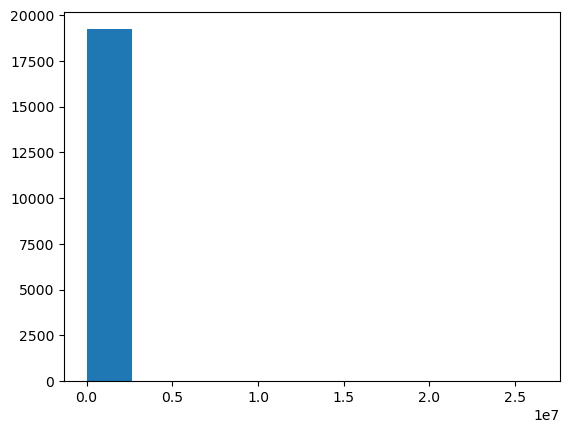

In [7]:
plt.hist(df["Price"])
# Afficher le graphique
plt.show()

In [8]:
# on convertit les features en une liste de columns
columns = df.columns.tolist()
columns

['ID',
 'Price',
 'Levy',
 'Manufacturer',
 'Model',
 'Prod. year',
 'Category',
 'Leather interior',
 'Fuel type',
 'Engine volume',
 'Mileage',
 'Cylinders',
 'Gear box type',
 'Drive wheels',
 'Doors',
 'Wheel',
 'Color',
 'Airbags']

## 3. Traitement des Valeurs abbérrantes

Vérifions si notre dataset ne comporte pas de  valeurs nulles

In [33]:
 df.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

Donc il n'ya pas de valeur nulle. Vérifions s'il existe de NaN.

In [34]:
 df.isna().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

Aucune valeur NaN non plus. Assurons-nous une fois qu'il n'ya pas de valeurs dupliquées.   

In [11]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
19232    False
19233    False
19234    False
19235    False
19236    False
Length: 19237, dtype: bool

Le resultat nous montre qu'il ya aucune valeur dupliquée. Notre dataset est propre pour faire la prédiction/Classification

Faisons le test de skewness et kurtosis pour voir les valeurs disparates ( outliers)

In [13]:
pd.DataFrame(data=[df[columns].skew(),df[columns].kurtosis()],index=['skewness','kurtosis'])

/tmp/ipykernel_48294/3591625058.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  pd.DataFrame(data=[df[columns].skew(),df[columns].kurtosis()],index=['skewness','kurtosis'])
/tmp/ipykernel_48294/3591625058.py:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  pd.DataFrame(data=[df[columns].skew(),df[columns].kurtosis()],index=['skewness','kurtosis'])


,ID,Price,Prod. year,Cylinders,Airbags
skewness,-11.868235,136.470427,-2.082261,2.091083,0.082012
kurtosis,201.161245,18824.517329,11.329766,6.486085,-1.334021


In [26]:
df.head(10)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
5,45802912,39493,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,160931 km,4.0,Automatic,Front,04-May,Left wheel,White,4
6,45656768,1803,761,TOYOTA,Prius,2010,Hatchback,Yes,Hybrid,1.8,258909 km,4.0,Automatic,Front,04-May,Left wheel,White,12
7,45816158,549,751,HYUNDAI,Sonata,2013,Sedan,Yes,Petrol,2.4,216118 km,4.0,Automatic,Front,04-May,Left wheel,Grey,12
8,45641395,1098,394,TOYOTA,Camry,2014,Sedan,Yes,Hybrid,2.5,398069 km,4.0,Automatic,Front,04-May,Left wheel,Black,12
9,45756839,26657,-,LEXUS,RX 350,2007,Jeep,Yes,Petrol,3.5,128500 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12


In [43]:
(df['Levy']=='-').sum()


5819

In [44]:
df['Gear box type'].unique()

array(['Automatic', 'Tiptronic', 'Variator', 'Manual'], dtype=object)

In [88]:
def toFloat(x):
    flt = float(x)
    return flt

def removeKm(x):
    x = x[:-3]
    return toFloat(x)

df.replace({'':np.nan}, inplace = True)

# remplacer le km en float

df['Mileage'] = df['Mileage'].map(lambda x:removeKm(x) )

# transformer le price en float

df['Price'] = df['Price'].map(lambda x:toFloat(x) )

# transformer l'année en float

df['Prod. year'] = df['Prod. year'].map(lambda x:toFloat(x) )



TypeError: 'int' object is not subscriptable

Donnons un identifiant à chaque caractère de de certains features


In [47]:
df['Gear box type'].unique()

array(['Automatic', 'Tiptronic', 'Variator', 'Manual'], dtype=object)

In [48]:
df['Fuel type'].unique()

array(['Hybrid', 'Petrol', 'Diesel', 'CNG', 'Plug-in Hybrid', 'LPG',
       'Hydrogen'], dtype=object)

In [49]:
my_array = df['Manufacturer'].unique()

array(['LEXUS', 'CHEVROLET', 'HONDA', 'FORD', 'HYUNDAI', 'TOYOTA',
       'MERCEDES-BENZ', 'OPEL', 'PORSCHE', 'BMW', 'JEEP', 'VOLKSWAGEN',
       'AUDI', 'RENAULT', 'NISSAN', 'SUBARU', 'DAEWOO', 'KIA',
       'MITSUBISHI', 'SSANGYONG', 'MAZDA', 'GMC', 'FIAT', 'INFINITI',
       'ALFA ROMEO', 'SUZUKI', 'ACURA', 'LINCOLN', 'VAZ', 'GAZ',
       'CITROEN', 'LAND ROVER', 'MINI', 'DODGE', 'CHRYSLER', 'JAGUAR',
       'ISUZU', 'SKODA', 'DAIHATSU', 'BUICK', 'TESLA', 'CADILLAC',
       'PEUGEOT', 'BENTLEY', 'VOLVO', 'სხვა', 'HAVAL', 'HUMMER', 'SCION',
       'UAZ', 'MERCURY', 'ZAZ', 'ROVER', 'SEAT', 'LANCIA', 'MOSKVICH',
       'MASERATI', 'FERRARI', 'SAAB', 'LAMBORGHINI', 'ROLLS-ROYCE',
       'PONTIAC', 'SATURN', 'ASTON MARTIN', 'GREATWALL'], dtype=object)

In [81]:
my_dict = {}

In [82]:
for i ,x in enumerate(my_array):
    variable = {x:i}
    my_dict.update(variable)
print(my_dict)
    

{'LEXUS': 0, 'CHEVROLET': 1, 'HONDA': 2, 'FORD': 3, 'HYUNDAI': 4, 'TOYOTA': 5, 'MERCEDES-BENZ': 6, 'OPEL': 7, 'PORSCHE': 8, 'BMW': 9, 'JEEP': 10, 'VOLKSWAGEN': 11, 'AUDI': 12, 'RENAULT': 13, 'NISSAN': 14, 'SUBARU': 15, 'DAEWOO': 16, 'KIA': 17, 'MITSUBISHI': 18, 'SSANGYONG': 19, 'MAZDA': 20, 'GMC': 21, 'FIAT': 22, 'INFINITI': 23, 'ALFA ROMEO': 24, 'SUZUKI': 25, 'ACURA': 26, 'LINCOLN': 27, 'VAZ': 28, 'GAZ': 29, 'CITROEN': 30, 'LAND ROVER': 31, 'MINI': 32, 'DODGE': 33, 'CHRYSLER': 34, 'JAGUAR': 35, 'ISUZU': 36, 'SKODA': 37, 'DAIHATSU': 38, 'BUICK': 39, 'TESLA': 40, 'CADILLAC': 41, 'PEUGEOT': 42, 'BENTLEY': 43, 'VOLVO': 44, 'სხვა': 45, 'HAVAL': 46, 'HUMMER': 47, 'SCION': 48, 'UAZ': 49, 'MERCURY': 50, 'ZAZ': 51, 'ROVER': 52, 'SEAT': 53, 'LANCIA': 54, 'MOSKVICH': 55, 'MASERATI': 56, 'FERRARI': 57, 'SAAB': 58, 'LAMBORGHINI': 59, 'ROLLS-ROYCE': 60, 'PONTIAC': 61, 'SATURN': 62, 'ASTON MARTIN': 63, 'GREATWALL': 64}


In [ ]:
my_dict.update(variable)


In [ ]:
my_dict.update(variable)


In [84]:
df['Gear box type'] = df['Gear box type'].map({'Automatic' : 0, 'Tiptronic': 1, 'Variator': 2, 'Manual': 3})
df['Fuel type'] = df['Fuel type'].map({'Hybrid' : 0, 'Petrol': 1, 'Diesel': 2, 'CNG': 3, 'Plug-in Hybrid': 4, 'LPG': 5,
       'Hydrogen': 6})
df['Manufacturer'] = df['Manufacturer'].map(my_dict)
# df['Gear box type'] = df['Gear box type'].map{'Automatic' : 0, 'Tiptronic': 1, 'Variator': 2, 'Manual': 3}

In [85]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,0,RX 450,2010,Jeep,Yes,0,3.5,186005,6.0,0,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,1,Equinox,2011,Jeep,No,1,3,192000,6.0,1,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,2,FIT,2006,Hatchback,No,1,1.3,200000,4.0,2,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,3,Escape,2011,Jeep,Yes,0,2.5,168966,4.0,0,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,2,FIT,2014,Hatchback,Yes,1,1.3,91901,4.0,0,Front,04-May,Left wheel,Silver,4
